In [12]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import warnings
import math
import csv

warnings.filterwarnings('ignore')

for lib in (mpl, sns):
    print(lib.__name__, lib.__version__)

# настройка размера шрифта легенды
mpl.rcParams['legend.title_fontsize'] = 12
mpl.rcParams['legend.fontsize'] = 12

matplotlib 3.8.1
seaborn 0.13.0


Создание датасета

In [ ]:
n = 3000
h = 0.3

y = np.array([h*i+n/10*math.sin(10*i/n*math.pi)+np.random.normal(0, n/30)
             for i in range(n)])
y_trend = np.array([h*i for i in range(n)])
fig, ax = plt.subplots(1, 1)
plt.plot(y)
plt.plot(y_trend)

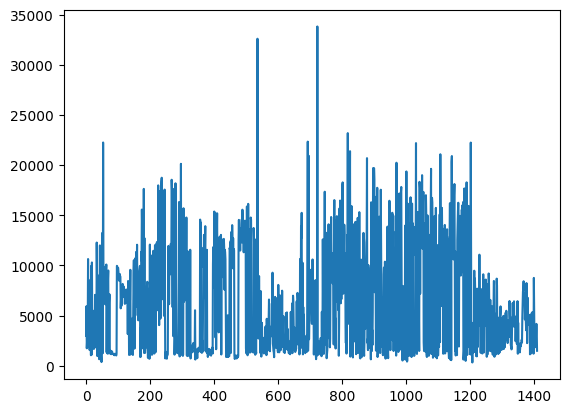

In [78]:

# with open("Daily-train.csv", 'r') as x:
# data = list(csv.reader(x, delimiter=","))
# data = np.array(data)
# display(data)
data = pd.read_csv("Daily-train.csv")
y = np.array(data.iloc[1:-1, 5])

data = pd.read_csv("Daily-test.csv")
y_test = np.array(data.iloc[1:-1, 5])

n = y.shape[0]
fig, ax = plt.subplots(1, 1)
plt.plot(y_test[::3])

Метод QR разложения

295165.82325529336


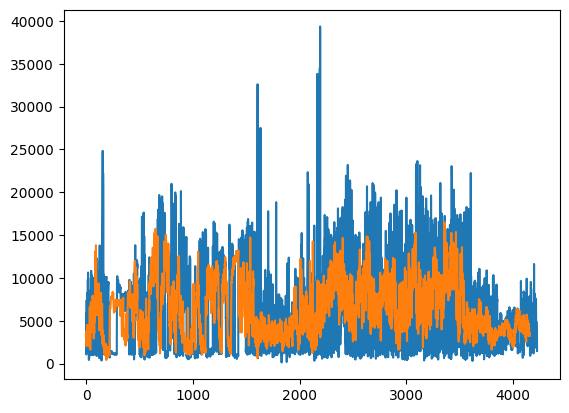

In [84]:
k = 70
A = np.zeros([n-k, k])
for i in range(k):
    A[:, k-i-1] = y[i:n-k+i]
b = y[k:n]
Q, R = np.linalg.qr(A)
x = np.linalg.solve(R, Q.T@b)

A_test = np.zeros([y_test.shape[0]-k, k])
for i in range(k):
    A_test[:, k-i-1] = y_test[i:n-k+i]

y_qr = A_test@x


# print(x)
plt.plot(y_test)
plt.plot(y_qr)
# plt.plot(y[k:]-y_qr)
print(np.linalg.norm(y_test[k:]-y_qr))

Метод SVD

295165.8232552933


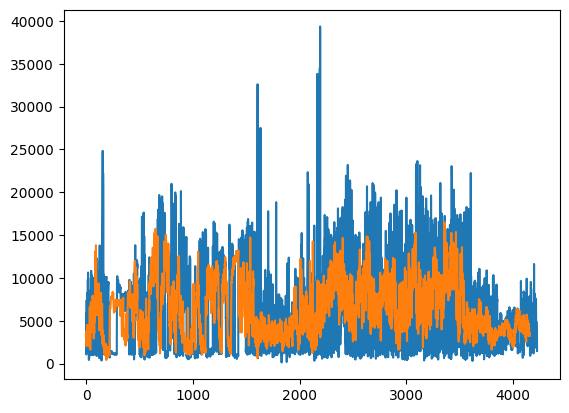

In [85]:
U, S, Vh = np.linalg.svd(A)
S_inv = np.zeros((U.shape[1], Vh.shape[0]))
for j in range(S.shape[0]):
    S_inv[j, j] = 1/S[j]
A_inv = Vh.T@S_inv.T@U.T
x_inv = A_inv@b

y_inv = A_test@x_inv
# print(x_inv)
plt.plot(y_test)
plt.plot(y_inv)
# plt.plot(y[k:]-y_inv)
print(np.linalg.norm(y_test[k:]-y_inv))

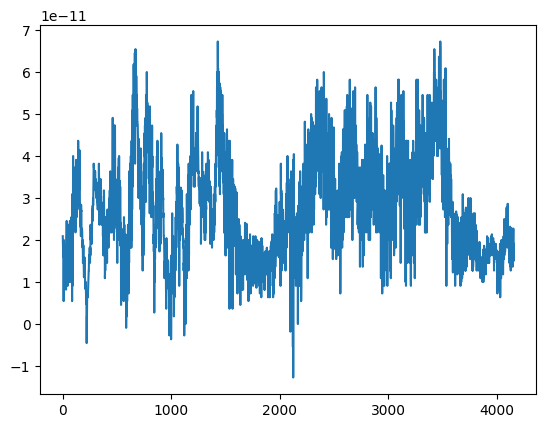

In [87]:
plt.plot(y_qr-y_inv)

In [88]:
print(np.linalg.norm(y_qr-y_inv))

1.9439198929218486e-09


Построение AR(k) с помощью библотеки statsmodels

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

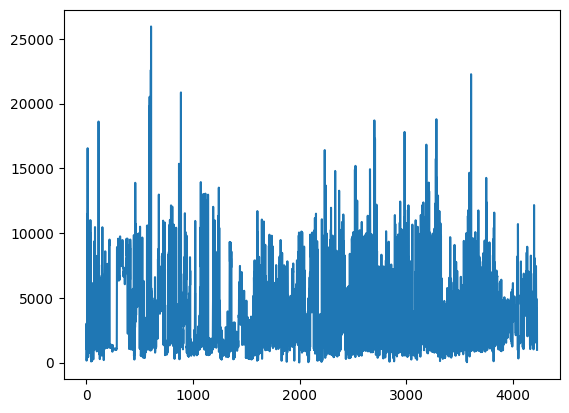

In [86]:
res = AutoReg(y, lags=k).fit()
plt.plot(y)
plt.plot(res.predict(y_test))
# plt.plot(y-res.predict())
print(np.linalg.norm(y[k+1:]-res.predict()[k+1:]))

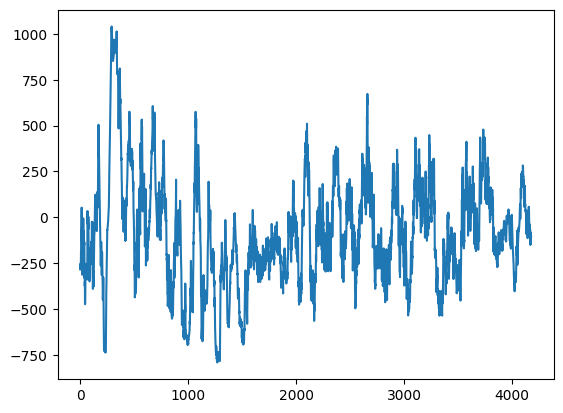

In [73]:
plt.plot(y_qr-res.predict()[k:])